### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Link to Repository
Link to Github repository below:
https://github.com/PollyannaHadley/LSE_DA301_Assignment

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values?
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

No missing data identified.

In [5]:
# Descriptive statistics.

In [6]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews.drop(columns=['language', 'platform'])

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'})

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('turtle_reviews_clean.csv')


# View DataFrame.
reviews_clean

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [11]:
# Independent variable.
x_spend = reviews_clean['spending_score']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x_spend'
reviews_spend = ols(f, data=reviews_clean).fit()

# Print the regression table.
reviews_spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        07:58:33   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_spend       33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters: ", reviews_spend.params)

# Extract the standard errors.
print("Standard errors: ", reviews_spend.bse)

# Extract the predicted values.
print("Predicted values: ", reviews_spend.predict())

Parameters:  Intercept   -75.052663
x_spend      33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x_spend       0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_spend = 33.061693 * x_spend -75.052663

# View the output.
y_pred_spend

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

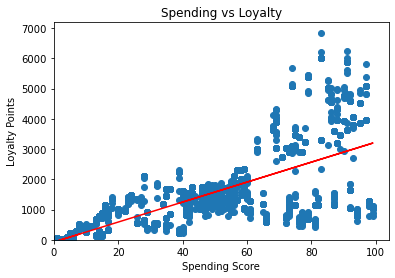

In [14]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x_spend,y)

# Plot the regression line (in black).
plt.plot(x_spend, y_pred_spend, color='red')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.title('Spending vs Loyalty')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.show()


### 5b) remuneration vs loyalty

In [15]:
# Independent variable.
x_rem = reviews_clean['remuneration']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x_rem'
reviews_rem = ols(f, data=reviews_clean).fit()

# Print the regression table.
reviews_rem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        07:58:33   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_rem         34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ", reviews_rem.params)

# Extract the standard errors.
print("Standard errors: ", reviews_rem.bse)

# Extract the predicted values.
print("Predicted values: ", reviews_rem.predict())

Parameters:  Intercept   -65.686513
x_rem        34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_rem         0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_rem = 34.187825 * x_rem -65.686513

# View the output.
y_pred_rem

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

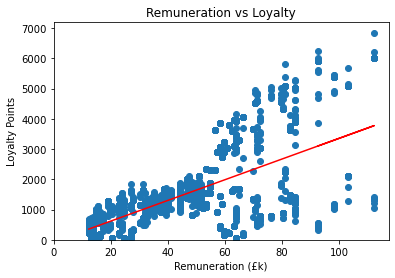

In [18]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x_rem,y)

# Plot the regression line (in black).
plt.plot(x_rem, y_pred_rem, color='red')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.title('Remuneration vs Loyalty')
plt.xlabel('Remuneration (£k)')
plt.ylabel('Loyalty Points')
plt.show()

### 5c) age vs loyalty

In [19]:
# Independent variable.
x_age = reviews_clean['age']

# Dependent variable.
y = reviews_clean['loyalty_points']

# OLS model and summary.
f = 'y ~ x_age'
reviews_age = ols(f, data=reviews_clean).fit()

# Print the regression table.
reviews_rem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        07:58:34   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_rem         34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
print("Parameters: ", reviews_age.params)

# Extract the standard errors.
print("Standard errors: ", reviews_age.bse)

# Extract the predicted values.
print("Predicted values: ", reviews_age.predict())

Parameters:  Intercept    1736.517739
x_age          -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_age         2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [21]:
# Set the X coefficient and the constant to generate the regression table.
y_pred_age = -4.012805 * x_age + 1736.517739

# View the output.
y_pred_age


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

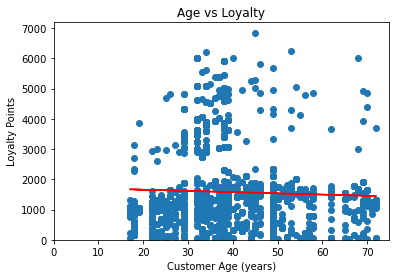

In [22]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x_age,y)

# Plot the regression line.
plt.plot(x_age, y_pred_age, color='red')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.title('Age vs Loyalty')
plt.xlabel('Customer Age (years)')
plt.ylabel('Loyalty Points')
plt.show()

## 6. Observations and insights

***Your observations here...***






The models show a positive linear regression for spend and remuneration meaning loyalty points tend to increase as the spending score and customer income increases. 
There is a very slight negative linear regression for the age variable which suggests variation in age does not have significant impact on the accumulation of loyalty points.
R-squared measures the percentage of variation of a dependent variable that is explained by an independent variable. The summary statistics for all three models show a R-squared value of less than 0.5 which suggests the model may not be the most suitable to fully understand the relationship, as this implies that less than 50% of the oberserved variation is explained by the model inputs. This is particularly noteable with remuneration and age where R-squared value is less than 0.4.
We should consider additional factors and conduct further analysis to minimise residuals and create a stronger, better-fitting model to better understand how customer accumulate loyalty points.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the CSV file(s) as df2.
df = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [25]:
# Drop unnecessary columns.
df2 = df.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'language', 
                  'platform', 'product', 'review', 'summary'])

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [26]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [27]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

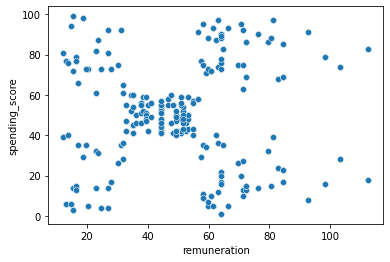

In [28]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
               data=df2)

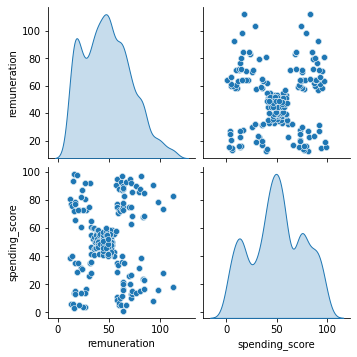

In [29]:
# Create a pairplot with Seaborn.
X = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=X, diag_kind='kde' )

## 3. Elbow and silhoutte methods

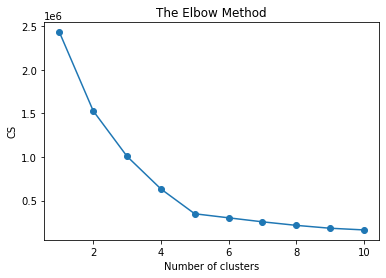

In [30]:
# Determine the number of clusters: Elbow method.
# Create an Elbow chart by employing a loop ranging from 1 to 10 to test potential cluster sizes
cs=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

# create a plot with a range between 1 and 10
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

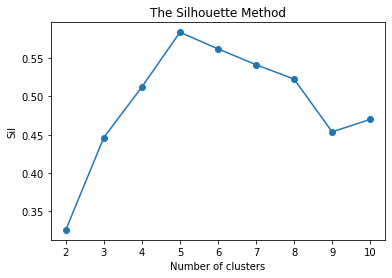

In [31]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(X)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

We will evaluate the useful of three different k values. Based on the analysis of the Elbow Method and Silhouette Method, we will valuate k values of 4, 5 and 6

###### Using 4 clusters:

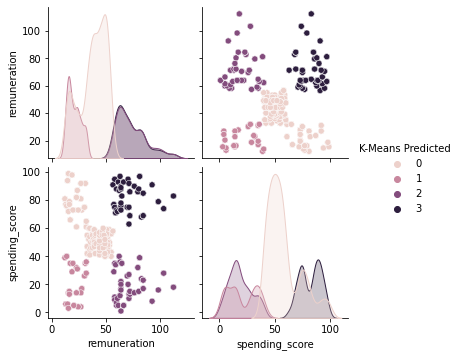

In [32]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(X)
clusters = kmeans.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted', diag_kind= 'kde')

In [33]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

###### Using 5 clusters:

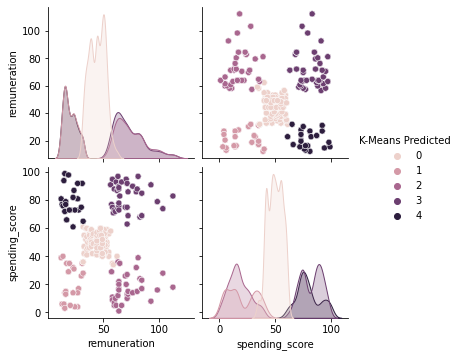

In [34]:
# Use 5 clusters:
kmeans_2 = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(X)
clusters = kmeans_2.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted', diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

###### Using 6 clusters:

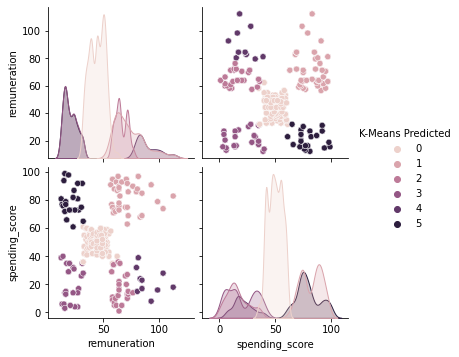

In [36]:
# Use 6 clusters:
kmeans_3 = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(X)
clusters = kmeans_3.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted', diag_kind= 'kde')

In [37]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

Based on the analysis above, the best clustering appears to be 5 clusters as these five clusters are clearly highlighted and identifiable in the visualisations. 
With 4 clusters, we note a significantly higher number of observations within one cluster.
With 6 clusters, there is clearly overlap between two groups (no. 2 and 4) and therefore they are not easy to distinghuse 
Therefore analysis with clusters of 4 or 6 does not appear to reflect the data distribution as effectivley.

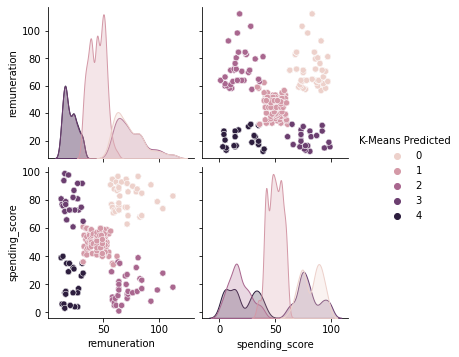

In [38]:
# Apply the final model using 5 clusters.
kmeans_final = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(X)
clusters = kmeans_final.labels_
X['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(X, hue='K-Means Predicted', diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
X['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [40]:
# View the DataFrame to sense-check the data analysis has been performed correctly.
print(X.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

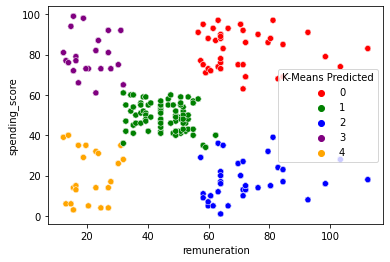

In [41]:
# Visualising the clusters using a scatterplot.
# Set plot size.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=X , hue='K-Means Predicted',
               palette=['red', 'green', 'blue', 'purple', 'orange'])

## 7. Discuss: Insights and observations

***Your observations here...***

There are five clear clusters in the data set, indicating there are five distinguishable customer categories with consideration to spending score and remuneration.
It would be interesting to see if there are any further subsets within the group, and further clusters based on other factors, e.g. education, gender, that would add value to the information used to target specific market segments.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [42]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load the data set as df3.
# Use data set from above.
df3 = reviews_clean

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [44]:
# Keep necessary columns. Drop unnecessary columns.
# Drop all columns except review and summary
df3 = df3.filter(['review', 'summary'], axis=1)

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [45]:
# Determine if there are any missing values.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


No missing (non-null) values identified in the df3 data set.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [46]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [47]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [48]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [49]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [50]:
# Drop duplicates in both columns.
# Check number of duplicates in review column
df3.review.duplicated().sum()

# View DataFrame.


50

In [51]:
# Drop duplicates in both columns.
# Check number of duplicates in summary column.
df3.summary.duplicated().sum()

649

In [52]:
# Drop duplicates from both columns.
df3_prep = df3.drop_duplicates(subset=['review'])
df3_prep = df3_prep.drop_duplicates(subset=['summary'])

# View DataFrame.
df3_prep

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1992,great game to keep the mind active we play it ...,great game to keep the mind active
1994,we are retired and find this a great way to st...,a great mind game


## 3. Tokenise and create wordclouds

In [53]:
# Create new DataFrame (copy DataFrame).
df3_prep_copy = df3_prep.copy()
df3_prep_copy.reset_index(inplace=True)

# View DataFrame.
df3_prep_copy

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1344,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1345,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1346,1992,great game to keep the mind active we play it ...,great game to keep the mind active
1347,1994,we are retired and find this a great way to st...,a great mind game


In [54]:
# Apply tokenisation to both columns.
# Apply to review column
df3_prep_copy['review_tokens'] = df3_prep_copy['review'].apply(word_tokenize)
df3_prep_copy['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [55]:
# Apply to summary column
df3_prep_copy['summary_tokens'] = df3_prep_copy['summary'].apply(word_tokenize)
df3_prep_copy['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [56]:
df3_prep_copy.head()

,index,review,summary,review_tokens,summary_tokens
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [57]:
# Review: Create a word cloud.

# String all reviews together in an empty variable.
all_reviews = ''
for i in range(df3_prep_copy.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + df3_prep_copy['review'][i]

In [58]:
# Create word cloud for reviews
word_cloud_reviews = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

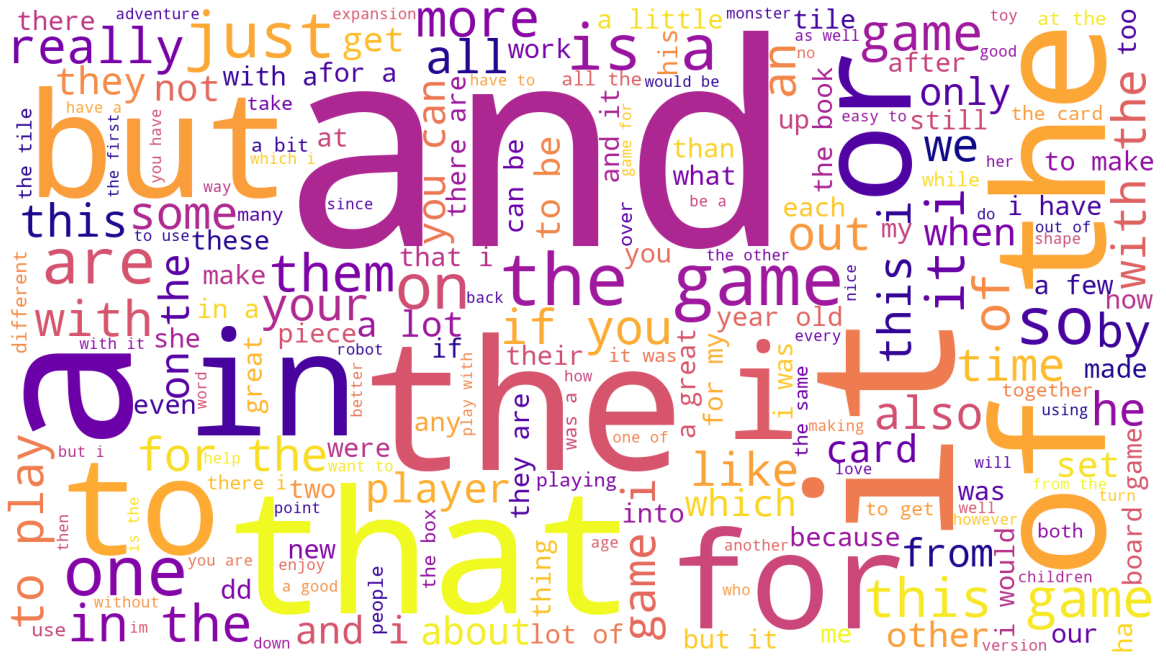

In [59]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_reviews) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [60]:
# Summary: Create a word cloud.

# String all summaries together in an empty variable.
all_summaries = ''
for i in range(df3_prep_copy.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + df3_prep_copy['summary'][i]

# Create word cloud for summaries
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries) 

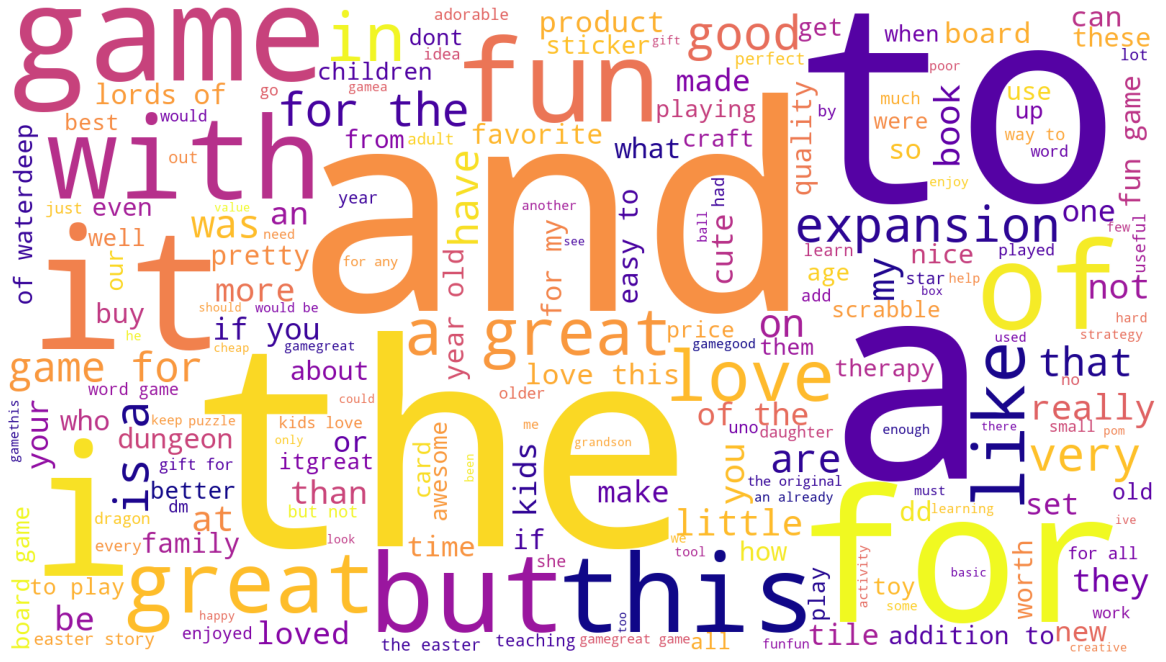

In [61]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Both word clouds include neutral stopwords that do not provide sufficient insight into the underlying sentiment. The word clouds will be recreated to exclude the stopwords.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [62]:
# Determine the frequency distribution.

# Reviews: Calculate the frequency distribution.
all_reviews_2 = []
for i in range(df3_prep_copy.shape[0]):
    # Add each comment.
    all_reviews_2 = all_reviews_2 + df3_prep_copy['review_tokens'][i]

fdist_reviews = FreqDist(all_reviews_2)

# Reviews: View distribution
fdist_reviews

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [63]:
# Summary: Calculate the frequency distribution.
all_summaries_2 = []
for i in range(df3_prep_copy.shape[0]):
    # Add each comment.
    all_summaries_2 = all_summaries_2 + df3_prep_copy['summary_tokens'][i]

fdist_summary = FreqDist(all_summaries_2)

# Summary: View distribution
fdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [64]:
# Review: Delete all the alpanum
tokens_rev_1 = [word for word in all_reviews_2 if word.isalnum()]

In [65]:
# Summary: Delete all the alpanum
tokens_sum_1 = [word for word in all_summaries_2 if word.isalnum()]

In [66]:
# Review: Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_rev_2 = [x for x in tokens_rev_1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_rev_2_string = ''

for value in tokens_rev_2:
    # Add each filtered token word to the string.
    tokens_rev_2_string = tokens_rev_2_string + value + ' '


In [67]:
# Summary: Remove all the stopwords.

# Create a filtered list of tokens without stop words.
tokens_sum_2 = [x for x in tokens_sum_1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_sum_2_string = ''

for value in tokens_rev_2:
    # Add each filtered token word to the string.
    tokens_sum_2_string = tokens_sum_2_string + value + ' '

### 4c) Create wordcloud without stopwords

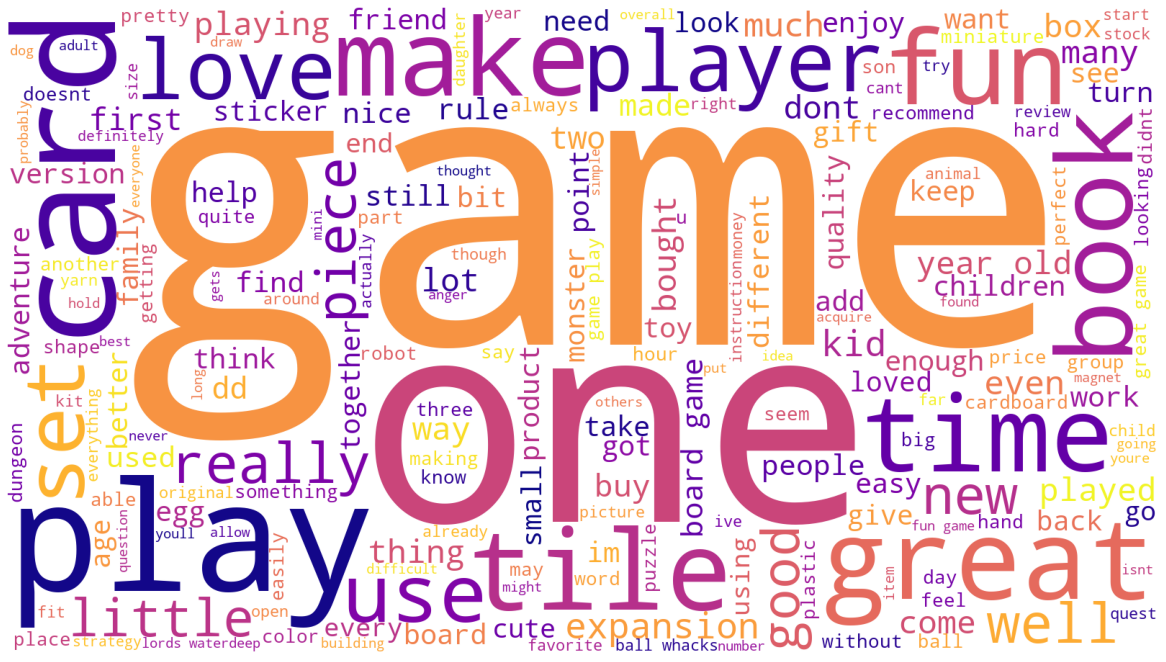

In [68]:
# Reviews: Create a wordcloud without stop words.
word_cloud_reviews_2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_rev_2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_reviews_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

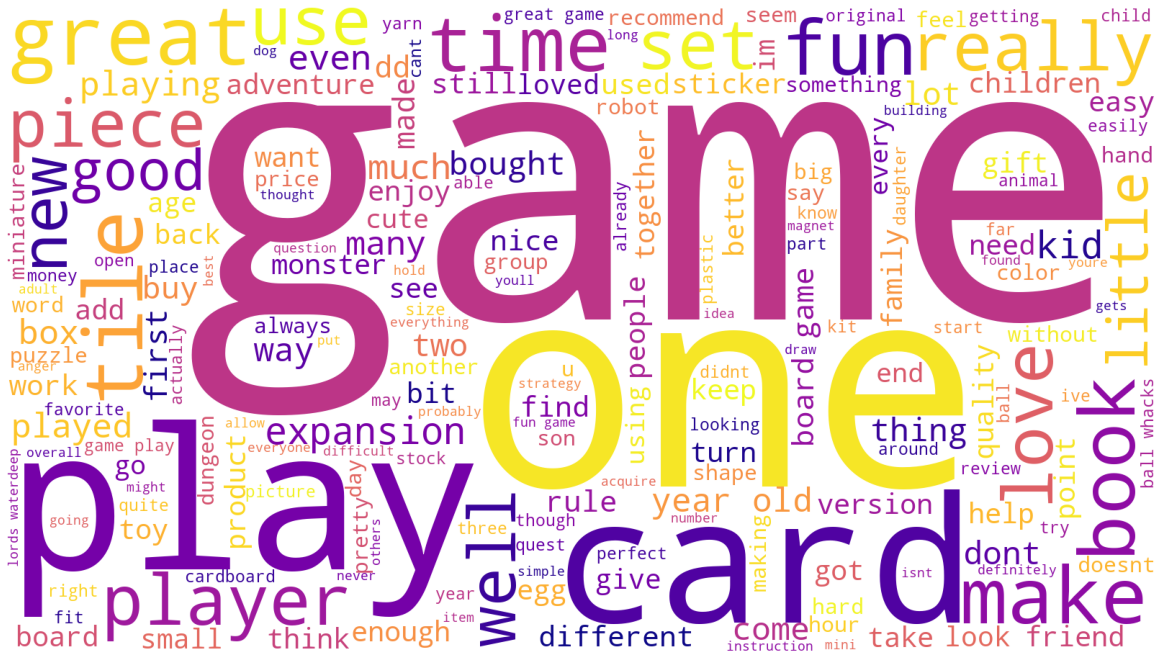

In [69]:
# Summary: Create a wordcloud without stop words.
word_cloud_summary_2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_sum_2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [70]:
# Determine the 15 most common words.

# From reviews.
review_counts = pd.DataFrame(Counter(tokens_rev_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

review_counts


,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


In [71]:
# Determine the 15 most common words.

# From summary.
summary_counts = pd.DataFrame(Counter(tokens_sum_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

summary_counts

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [72]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Additional function to assess subjectivity
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [73]:
# Determine polarity of both columns. 
# Populate a new column with polairty scores for each comment.
df3_prep_copy['polarity_review'] = df3_prep_copy['review'].apply(generate_polarity)
df3_prep_copy['polarity_summary'] = df3_prep_copy['summary'].apply(generate_polarity)
df3_prep_copy['subjectivity_review'] = df3_prep_copy['review'].apply(generate_subjectivity)
df3_prep_copy['subjectivity_summary'] = df3_prep_copy['summary'].apply(generate_subjectivity)

# View output.
df3_prep_copy.head()

,index,review,summary,review_tokens,summary_tokens,polarity_review,polarity_summary,subjectivity_review,subjectivity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,0.486111,0.500000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,0.442976,0.900000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,0.430435,0.733333
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,0.784848,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,0.316667,0.000000


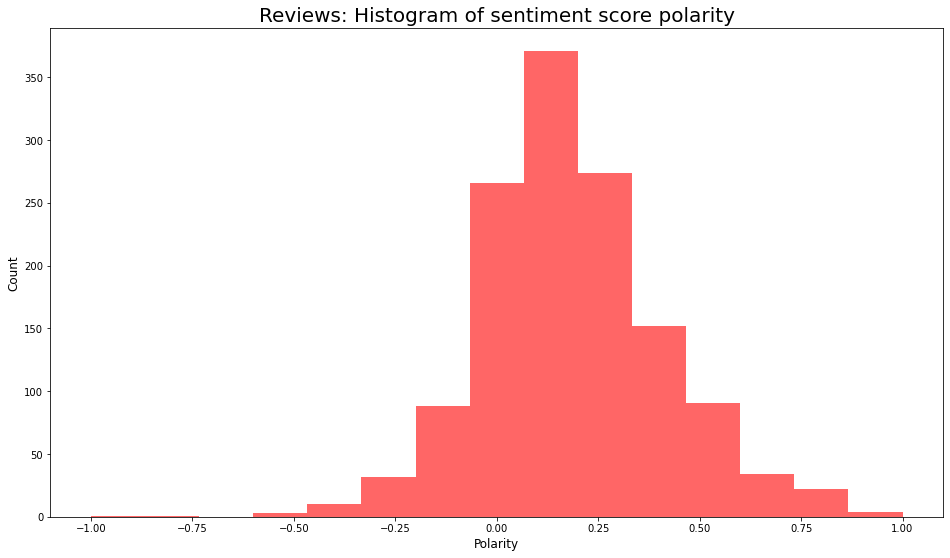

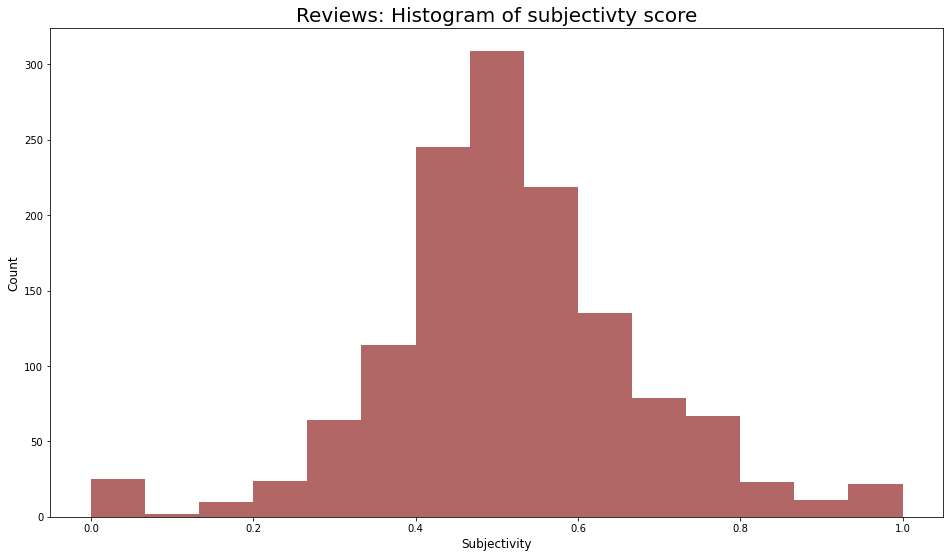

In [74]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_prep_copy['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reviews: Histogram of sentiment score polarity', fontsize=20)

plt.show();


# Histogram of subjetivity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_prep_copy['subjectivity_review'], num_bins, facecolor='maroon', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Reviews: Histogram of subjectivty score', fontsize=20)

plt.show();


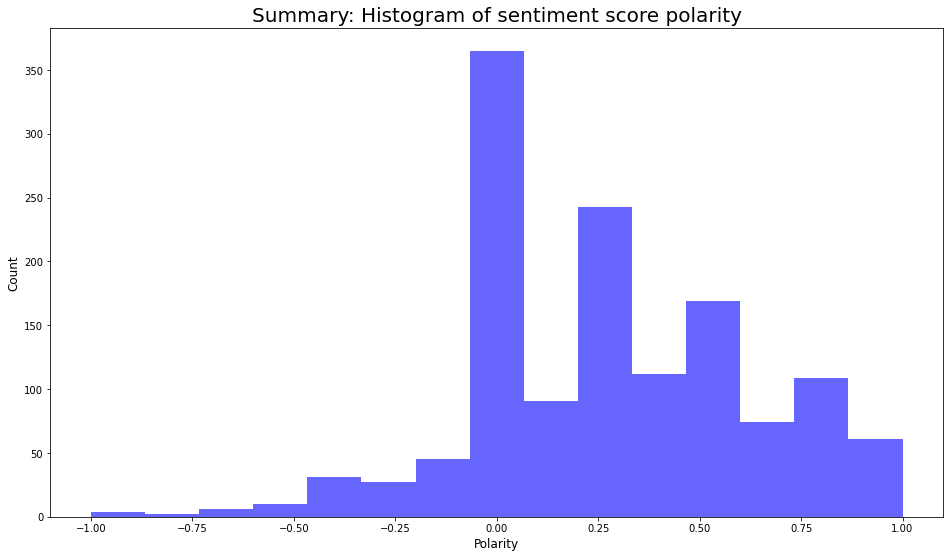

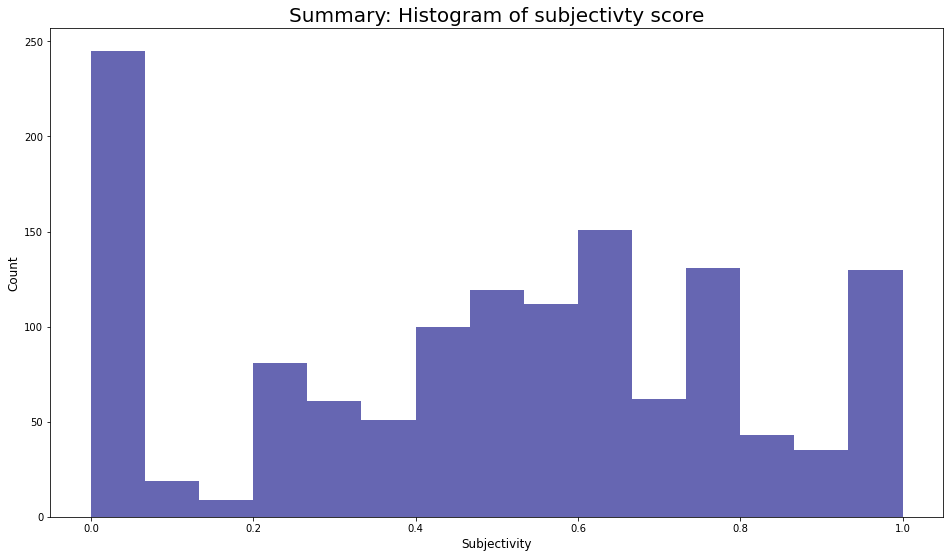

In [75]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_prep_copy['polarity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of sentiment score polarity', fontsize=20)

plt.show();

# Histogram of subjetivity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_prep_copy['subjectivity_summary'], num_bins, facecolor='navy', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of subjectivty score', fontsize=20)

plt.show();

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [76]:
# Top 20 negative reviews.
negative_reviews = df3_prep_copy.nsmallest(20, 'polarity_review')

negative_reviews = negative_reviews[['review']]

# View output
negative_reviews.style.set_properties(subset=['review'], **{'width': '2000px'})


,review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not
147,incomplete kit very disappointing
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities
355,my son loves playing this game it was recommended by a counselor at school that works with him
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon


In [77]:
# Top 20 negative summaries.
negative_summary = df3_prep_copy.nsmallest(20, 'polarity_summary')

negative_summary = negative_summary[['summary']]

# View output.
negative_summary.style.set_properties(subset=['summary'], **{'width': '2000px'})


,summary
17,the worst value ive ever seen
165,boring unless you are a craft person which i am
587,boring
837,before this i hated running any rpg campaign dealing with towns because it
1,another worthless dungeon masters screen from galeforce9
116,disappointed
266,promotes anger instead of teaching calming methods
634,too bad this is not what i was expecting
637,bad qualityall made of paper
144,at age 31 i found these very difficult to make


In [78]:
# Top 20 positive reviews.
positive_reviews = df3_prep_copy.nlargest(20, 'polarity_review')

positive_reviews = positive_reviews[['review']]

# View output
positive_reviews.style.set_properties(subset=['review'], **{'width': '2000px'})



,review
564,perfect
1080,my daughter loves her stickers awesome seller thank you
1334,perfect for tutoring my grandson in spelling
890,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy
498,great quality very cute and perfect for my toddler
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons
336,great seller happy with my purchase 5 starrrr
439,great easter gift for kids
491,these are great
692,bought this because i wanted it all these dd games are great


In [79]:
# Top 20 positive summaries.
positive_summary = df3_prep_copy.nlargest(20, 'polarity_summary')

positive_summary = positive_summary[['summary']]

# View output.
positive_summary.style.set_properties(subset=['summary'], **{'width': '2000px'})

,summary
5,best gm screen ever
23,wonderful designs
27,perfect
61,theyre the perfect size to keep in the car or a diaper
107,perfect for preschooler
112,awesome sticker activity for the price
132,awesome book
133,he was very happy with his gift
150,awesome
166,awesome and welldesigned for 9 year olds


## 7. Discuss: Insights and observations

***Your observations here...***

Both word clouds (excluding stopwords) present similar emphasised words, leaning towards more of a positive sentiment. This is supported by the sentiment of words appearing most often in the list of the top 15 most frequently used words.
The histograms presenting the distribution of polarity scores show there appears to be more of a positive sentiment in both the customer reviews and summary of reviews as shown by a higher count falling >0.
When reviewing the subjectivity score, we can see that in both the reviews and summary of customer reviews, there is no definitive trend as to whether the customers comments are more opinionated for factual.
The next step was to identify the top 20 most positive reviews, and top 20 most negative reviews (see Appendix 2). It was noted that there were some positive reviews included within the 20 most negative reviews – this appears to be because ‘anger’ is mentioned in the review in a positive manner however the sentiment analysis has identified this as a negative sentiment. This is a general limitation of the polarity score as it cannot always correctly evaluate the tone of textual sentences.
Whilst this information provides a good base for understanding sentiment, further analysis should be performed to understand what product type and customer demographic these reviews relate this to identify any trends, e.g. problems with a specific product that needs addressing to meet customer expectations.

# 